**YouTube Video ML Models: Language, Category & Duration Classification**

Description:

Language Classification Model – predicts the language of a video based on its title and description.

Category Classification Model – predicts video categories such as Education, Sports, Entertainment, and News.

Duration Classification Model – labels videos as Short, Medium, or Large based on their duration.

Features included:


Text preprocessing with TF-IDF.


Naive Bayes classification for all three models.


Accuracy evaluation and confusion matrix visualizations for detailed insights.


Visual comparison of model performances using bar charts and heatmaps.


Robust handling of missing labels and duplicates in merged datasets.

**Importing Files and Load Data**

In [2]:
import pandas as pd
import numpy as np
df1=pd.read_csv("channel_master_cleaned.csv")
df2=pd.read_csv("video_summary_cleaned.csv")

In [4]:
df1.head()

,Channelid,subscribercount,channelname,title,uploader,channelurl,shortdescription
0,UCIx3RWYwikMlDiJeCEUbfEA,7170000.0,Wunderbar Films,Wunderbar Films,Wunderbar Films,https://www.youtube.com/channel/UCIx3RWYwikMlD...,This channel belongs to Wunderbar Films Wunder...
1,UCLbdVvreihwZRL6kwuEUYsA,21100000.0,Think Music India,Think Music India,Think Music India,https://www.youtube.com/channel/UCLbdVvreihwZR...,About Think Music - Official Channel The offic...
2,UCdwQOUt3ns-BSWlLFK-fEpA,370000.0,Comedy One,Comedy One,Comedy One,https://www.youtube.com/channel/UCdwQOUt3ns-BS...,The Home of Funny!! In the hustle and bustle o...
3,UCzee67JnEcuvjErRyWP3GpQ,10000000.0,Saregama Tamil,Saregama Tamil,Saregama Tamil,https://www.youtube.com/channel/UCzee67JnEcuvj...,Saregama India Limited - the one-stop destinat...
4,UCCPWi_OwWMR5JTiujn7v-7g,540000.0,Tamil Gaming தமிழ் கேமிங்,Tamil Gaming தமிழ் கேமிங்,Tamil Gaming தமிழ் கேமிங்,https://www.youtube.com/channel/UCCPWi_OwWMR5J...,வணக்கம் இது தமிழ் கேமிங் நாங்கள் விவேக் மற்றும...


In [5]:
df2.head()

,video_id,title,uploader,channel_id,video_url,duration_sec,view_count,language
0,S4_guCIHpUM,Anything But Kalyanam | Tamil Web Series | Eng...,TICK Entertainment - Tamil,UCQhqq-oQ1ZYo2etaG0q68EA,https://www.youtube.com/shorts/S4_guCIHpUM,35,5918004,tamil
1,mEYVfy8MvZ0,"3 - Kannazhaga Tamil Lyric | Dhanush, Shruti |...",SonyMusicSouthVEVO,UCTNtRdBAiZtHP9w7JinzfUg,https://www.youtube.com/watch?v=mEYVfy8MvZ0,209,24769240,tamil
2,jQ55i6NJTG4,Tamil Letters,Safras views on competitive exam,UC7YnNWFabe8nhxcNlu7h7Jw,https://www.youtube.com/shorts/jQ55i6NJTG4,14,796286,tamil
3,kCjrcVnyLj8,Learn Tamil Write and Pronounce அ Letter,Want2Learn,UCT4bT6KtE_8Z3U78bwIu71w,https://www.youtube.com/shorts/kCjrcVnyLj8,5,17823,tamil
4,TzNYi0NZNnw,TVK’s Edhirkalam by ACHU Josiam,ABN Achu,UCiBhuDqvizh86j2vK3k4JrA,https://www.youtube.com/shorts/TzNYi0NZNnw,23,10605594,tamil


Check empty rows Columns in df1 and df2

In [9]:
df1.isna().sum()

,0
Channelid,0
subscribercount,0
channelname,0
title,0
uploader,0
channelurl,0
shortdescription,0


In [10]:
df2.isna().sum()

,0
video_id,0
title,0
uploader,0
channel_id,0
video_url,0
duration_sec,0
view_count,0
language,0


Check duplicate values in dataframes

In [11]:
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4328,False
4329,False
4330,False
4331,False


In [12]:
df2.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6138,False
6139,False
6140,False
6141,False


check Shape of dataset

In [14]:
print(df1.shape)
print(df2.shape)

(4333, 7)
(6143, 8)


Check columns names in Dataframes

In [15]:
print(df1.columns.tolist())

['Channelid', 'subscribercount', 'channelname', 'title', 'uploader', 'channelurl', 'shortdescription']


In [16]:
print(df2.columns.tolist())

['video_id', 'title', 'uploader', 'channel_id', 'video_url', 'duration_sec', 'view_count', 'language']


**Merge the two csv files(channel_master_cleaned.csv,video_summary_cleaned.csv) both files have a common channed_id attribute**



In [17]:
df1=df1.rename(columns={'Channelid':'channel_id'})
#df=df2.merge(df1,on='channel_id',how='left')

In [18]:
df1.columns

Index(['channel_id', 'subscribercount', 'channelname', 'title', 'uploader',
       'channelurl', 'shortdescription'],
      dtype='object')

In [26]:
merged_df=pd.merge(df2,df1[['channel_id','subscribercount', 'channelname', 'uploader', 'channelurl', 'shortdescription']],on='channel_id',how='left')

In [27]:
merged_df.shape

(6143, 13)

**Prepare Text**

combine column  title and short_description
and cleaned  it

In [28]:
import re
#title+short_description
merged_df['text']=merged_df['title'] + merged_df['shortdescription']

In [32]:
#lowercase and remove special characters
merged_df['text_clean']=merged_df['text'].str.lower().fillna('')
merged_df['text_clean']=merged_df['text_clean'].apply(lambda x:re.sub(r'[^a-zA-Z\s]','',x))


 **Model A**

  Category Classification on the basis description and title
  
   (sports,news,entertainment and education)

Creating a Labels (catrgory)



In [37]:
def categorize(text):
  text=text.lower()
  if any(word in text for word in ['study','learn','tutorial','course']):
    return 'Education'
  elif any(word in text for word in ['Game','match','team','score','Goal']):
    return 'Sports'
  elif any(word in text for word in ['Movie','Song','Show','Fun','webseries','drame']):
    return 'Entertainment'
  elif any(word in text for word in ['News','Report','Update']):
    return 'News'
  else:
    return 'Other'
merged_df['category']=merged_df['text_clean'].apply(categorize)

In [38]:
merged_df.head()

,video_id,title,uploader_x,channel_id,video_url,duration_sec,view_count,language,subscribercount,channelname,uploader_y,channelurl,shortdescription,text,text_clean,category
0,S4_guCIHpUM,Anything But Kalyanam | Tamil Web Series | Eng...,TICK Entertainment - Tamil,UCQhqq-oQ1ZYo2etaG0q68EA,https://www.youtube.com/shorts/S4_guCIHpUM,35,5918004,tamil,318000.0,TICK Entertainment - Tamil,TICK Entertainment - Tamil,https://www.youtube.com/channel/UCQhqq-oQ1ZYo2...,Tick Entertainment is the part of Tick Network...,Anything But Kalyanam | Tamil Web Series | Eng...,anything but kalyanam tamil web series engli...,Other
1,mEYVfy8MvZ0,"3 - Kannazhaga Tamil Lyric | Dhanush, Shruti |...",SonyMusicSouthVEVO,UCTNtRdBAiZtHP9w7JinzfUg,https://www.youtube.com/watch?v=mEYVfy8MvZ0,209,24769240,tamil,22400000.0,SonyMusicSouthVEVO,SonyMusicSouthVEVO,https://www.youtube.com/channel/UCTNtRdBAiZtHP...,The official VEVO channel of Sony Music Entert...,"3 - Kannazhaga Tamil Lyric | Dhanush, Shruti |...",kannazhaga tamil lyric dhanush shruti anir...,Other
2,jQ55i6NJTG4,Tamil Letters,Safras views on competitive exam,UC7YnNWFabe8nhxcNlu7h7Jw,https://www.youtube.com/shorts/jQ55i6NJTG4,14,796286,tamil,2320.0,Safras views on competitive exam,Safras views on competitive exam,https://www.youtube.com/channel/UC7YnNWFabe8nh...,Follow learn practice to achieve success,Tamil LettersFollow learn practice to achieve ...,tamil lettersfollow learn practice to achieve ...,Education
3,kCjrcVnyLj8,Learn Tamil Write and Pronounce அ Letter,Want2Learn,UCT4bT6KtE_8Z3U78bwIu71w,https://www.youtube.com/shorts/kCjrcVnyLj8,5,17823,tamil,8660.0,Want2Learn,Want2Learn,https://www.youtube.com/channel/UCT4bT6KtE_8Z3...,Want2learn.com provides opportunities to learn...,Learn Tamil Write and Pronounce அ LetterWant2l...,learn tamil write and pronounce letterwantlea...,Education
4,TzNYi0NZNnw,TVK’s Edhirkalam by ACHU Josiam,ABN Achu,UCiBhuDqvizh86j2vK3k4JrA,https://www.youtube.com/shorts/TzNYi0NZNnw,23,10605594,tamil,1310000.0,ABN Achu,ABN Achu,https://www.youtube.com/channel/UCiBhuDqvizh86...,Hey loves❣️with all ur Love and Support I’m st...,TVK’s Edhirkalam by ACHU JosiamHey loves❣️with...,tvks edhirkalam by achu josiamhey loveswith al...,Other


Use TF-IDF to convert text into numeric features:

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_features=vectorizer.fit_transform(merged_df['text_clean'])

Model B

Content category classification on the basis of vid_duration

Creating Duration labels


*   short  : <240 sec (<4 min)
*   medium : <240-1200 sec (4-20 min)
*   large  : >1200 sec (>20 min)




In [44]:
def duration_label(seconds):
  if seconds < 240:
    return 'short video'
  elif seconds <=1200:
    return 'medium video'
  else:
    return 'Large'
merged_df['duration_label']=merged_df['duration_sec'].apply(duration_label)

**Encode duration label**

ML model can't used text directly for that we use label encoder

In [45]:
from sklearn .preprocessing import LabelEncoder
le_duration =LabelEncoder()
merged_df['duration_encoded']=le_duration.fit_transform(merged_df['duration_label'])
# Now duration encoded is numeric(0,1,2) for short,medium and large


In [49]:
#pip install scipy

In [55]:
import numpy as np
from scipy.sparse import hstack

# Convert to numpy and make 2D
X_numeric = np.array(merged_df['duration_encoded']).reshape(-1, 1)

# Combine with TF-IDF features
X = hstack([X_text, X_numeric])
y= merged_df['language']


**Split Data**

Model A (category classification: News, Sports , education ,entertainment)

Model B (Language Classification: tamil,Hindi....)

In [63]:
from sklearn.model_selection import train_test_split

#Category Model
X_train_cat,X_test_cat,y_train_cat,y_test_cat=train_test_split( x_features,merged_df['category'],test_size=0.2,random_state=42)

# Video duration Model
X_train_dur,x_test_dur,y_train_dur,y_test_dur=train_test_split(X,y,test_size=0.2,random_state=42)

#Language Model
X_train_lang,X_test_lang,y_train_lang,y_test_lang=train_test_split( x_features,merged_df['language'],test_size=0.2,random_state=42)



**Train Models**

Used Multinomial Naive Bayes (Good for text)

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Category
model_cat=MultinomialNB()
model_cat.fit(X_train_cat,y_train_cat)
y_pred_cat=model_cat.predict(X_test_cat)
print('Content classifiaction  Model Accuracy Score :',accuracy_score(y_test_cat,y_pred_cat))

# Video duration
model_duration= MultinomialNB()
model_duration.fit(X_train_dur,y_train_dur)
y_pred_dur=model_duration.predict(x_test_dur)
print('Video Duration Model Accuracy Score :',accuracy_score(y_test_dur,y_pred_dur))

# Language Model
model_lang=MultinomialNB()
model_lang.fit(X_train_lang,y_train_lang)
y_pred_lang=model_lang.predict(X_test_lang)
print('Language Model Accuracy Score :',accuracy_score(y_test_lang,y_pred_lang))

Content classifiaction  Model Accuracy Score : 0.9072416598860863
Video Duration Model Accuracy Score : 0.774613506916192
Language Model Accuracy Score : 0.790886899918633


Model	                       Accuracy	         

Content Classification	     0.907 (~91%)      (Overfit slighty)best performer

Language Classification	     0.791 (~79%)	     Good Model Fit perfectly

Video Duration Classification	0.775 (~77%)	   perform Well on Model


** Comparision of Three Model **

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


 **Bar Chart of Accuracy Score**

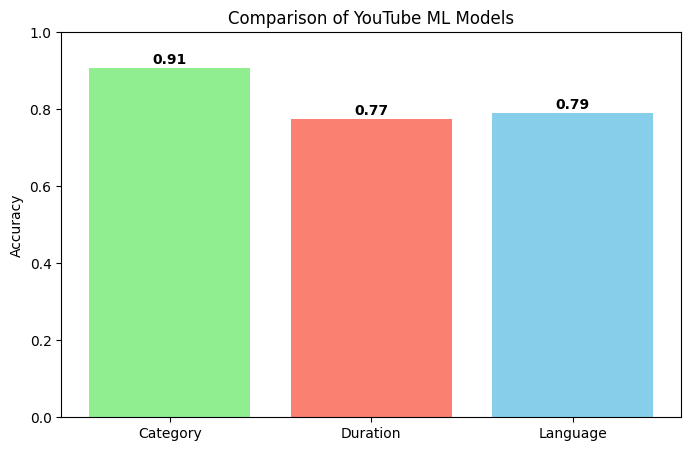

In [67]:
accuracy_cat = accuracy_score(y_test_cat, y_pred_cat)
accuracy_dur = accuracy_score(y_test_dur, y_pred_dur)
accuracy_lang = accuracy_score(y_test_lang, y_pred_lang)

models = ['Category', 'Duration', 'Language']
accuracies = [accuracy_cat, accuracy_dur, accuracy_lang]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['lightgreen','salmon','skyblue'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of YouTube ML Models')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v,2)), ha='center', fontweight='bold')
plt.show()


**Confusion Matrix For three models**

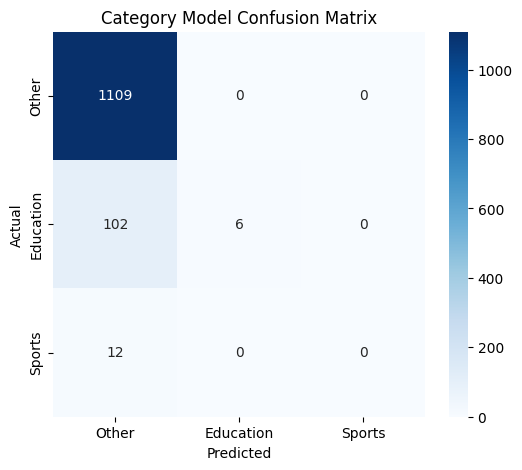

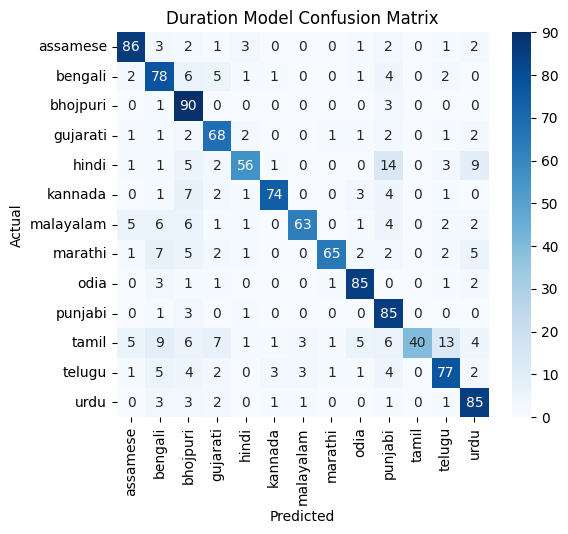

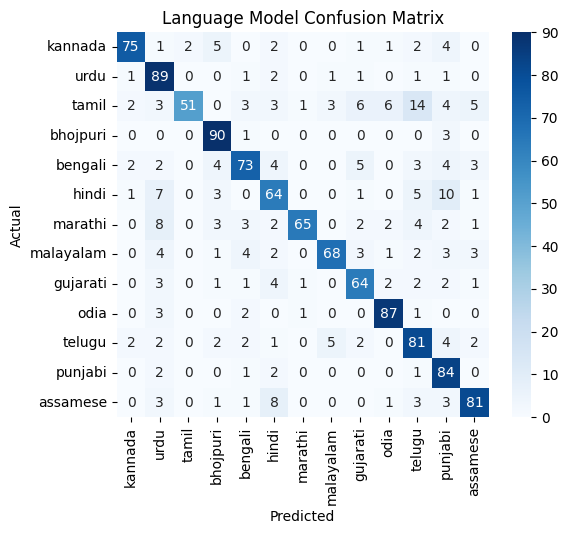

In [72]:
def plot_confusion(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Category Model
plot_confusion(y_test_cat, y_pred_cat, labels=list(y_test_cat.unique()), title="Category Model Confusion Matrix")

# Duration Model
labels_duration = sorted(y_test_dur.unique())  # automatically get present classes
plot_confusion(y_test_dur, y_pred_dur, labels=labels_duration, title="Duration Model Confusion Matrix")


# Language Model
plot_confusion(y_test_lang, y_pred_lang, labels=list(y_test_lang.unique()), title="Language Model Confusion Matrix")
